<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/Neural_Net(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

Load the Dataset

In [47]:
data1=pd.read_csv("/content/forestfires.csv")
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


EDA

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [49]:
data2=data1.iloc[:,0:11]
forest=pd.concat([data2,data1["size_category"]],axis=1)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


Visualisation

<Axes: xlabel='temp', ylabel='wind'>

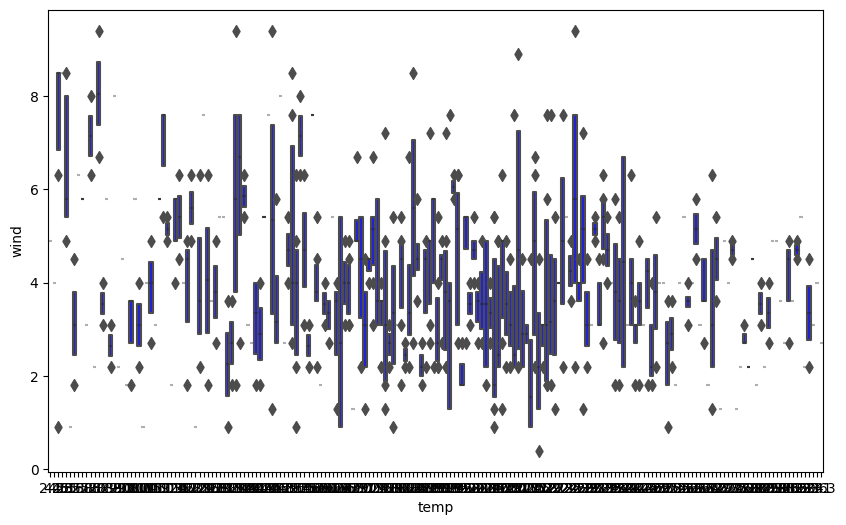

In [50]:
plt.figure(figsize=(10,6))
sns.boxenplot(x="temp",y="wind",color="b",data=data2)

Label Encoding for Categorical Features

In [51]:
label_encoder=LabelEncoder()
forest["size_category"]=label_encoder.fit_transform(forest["size_category"])
forest['month']= label_encoder.fit_transform(forest['month'])
forest['day']= label_encoder.fit_transform(forest['day'])
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


Independent and Dependent Variables

In [52]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


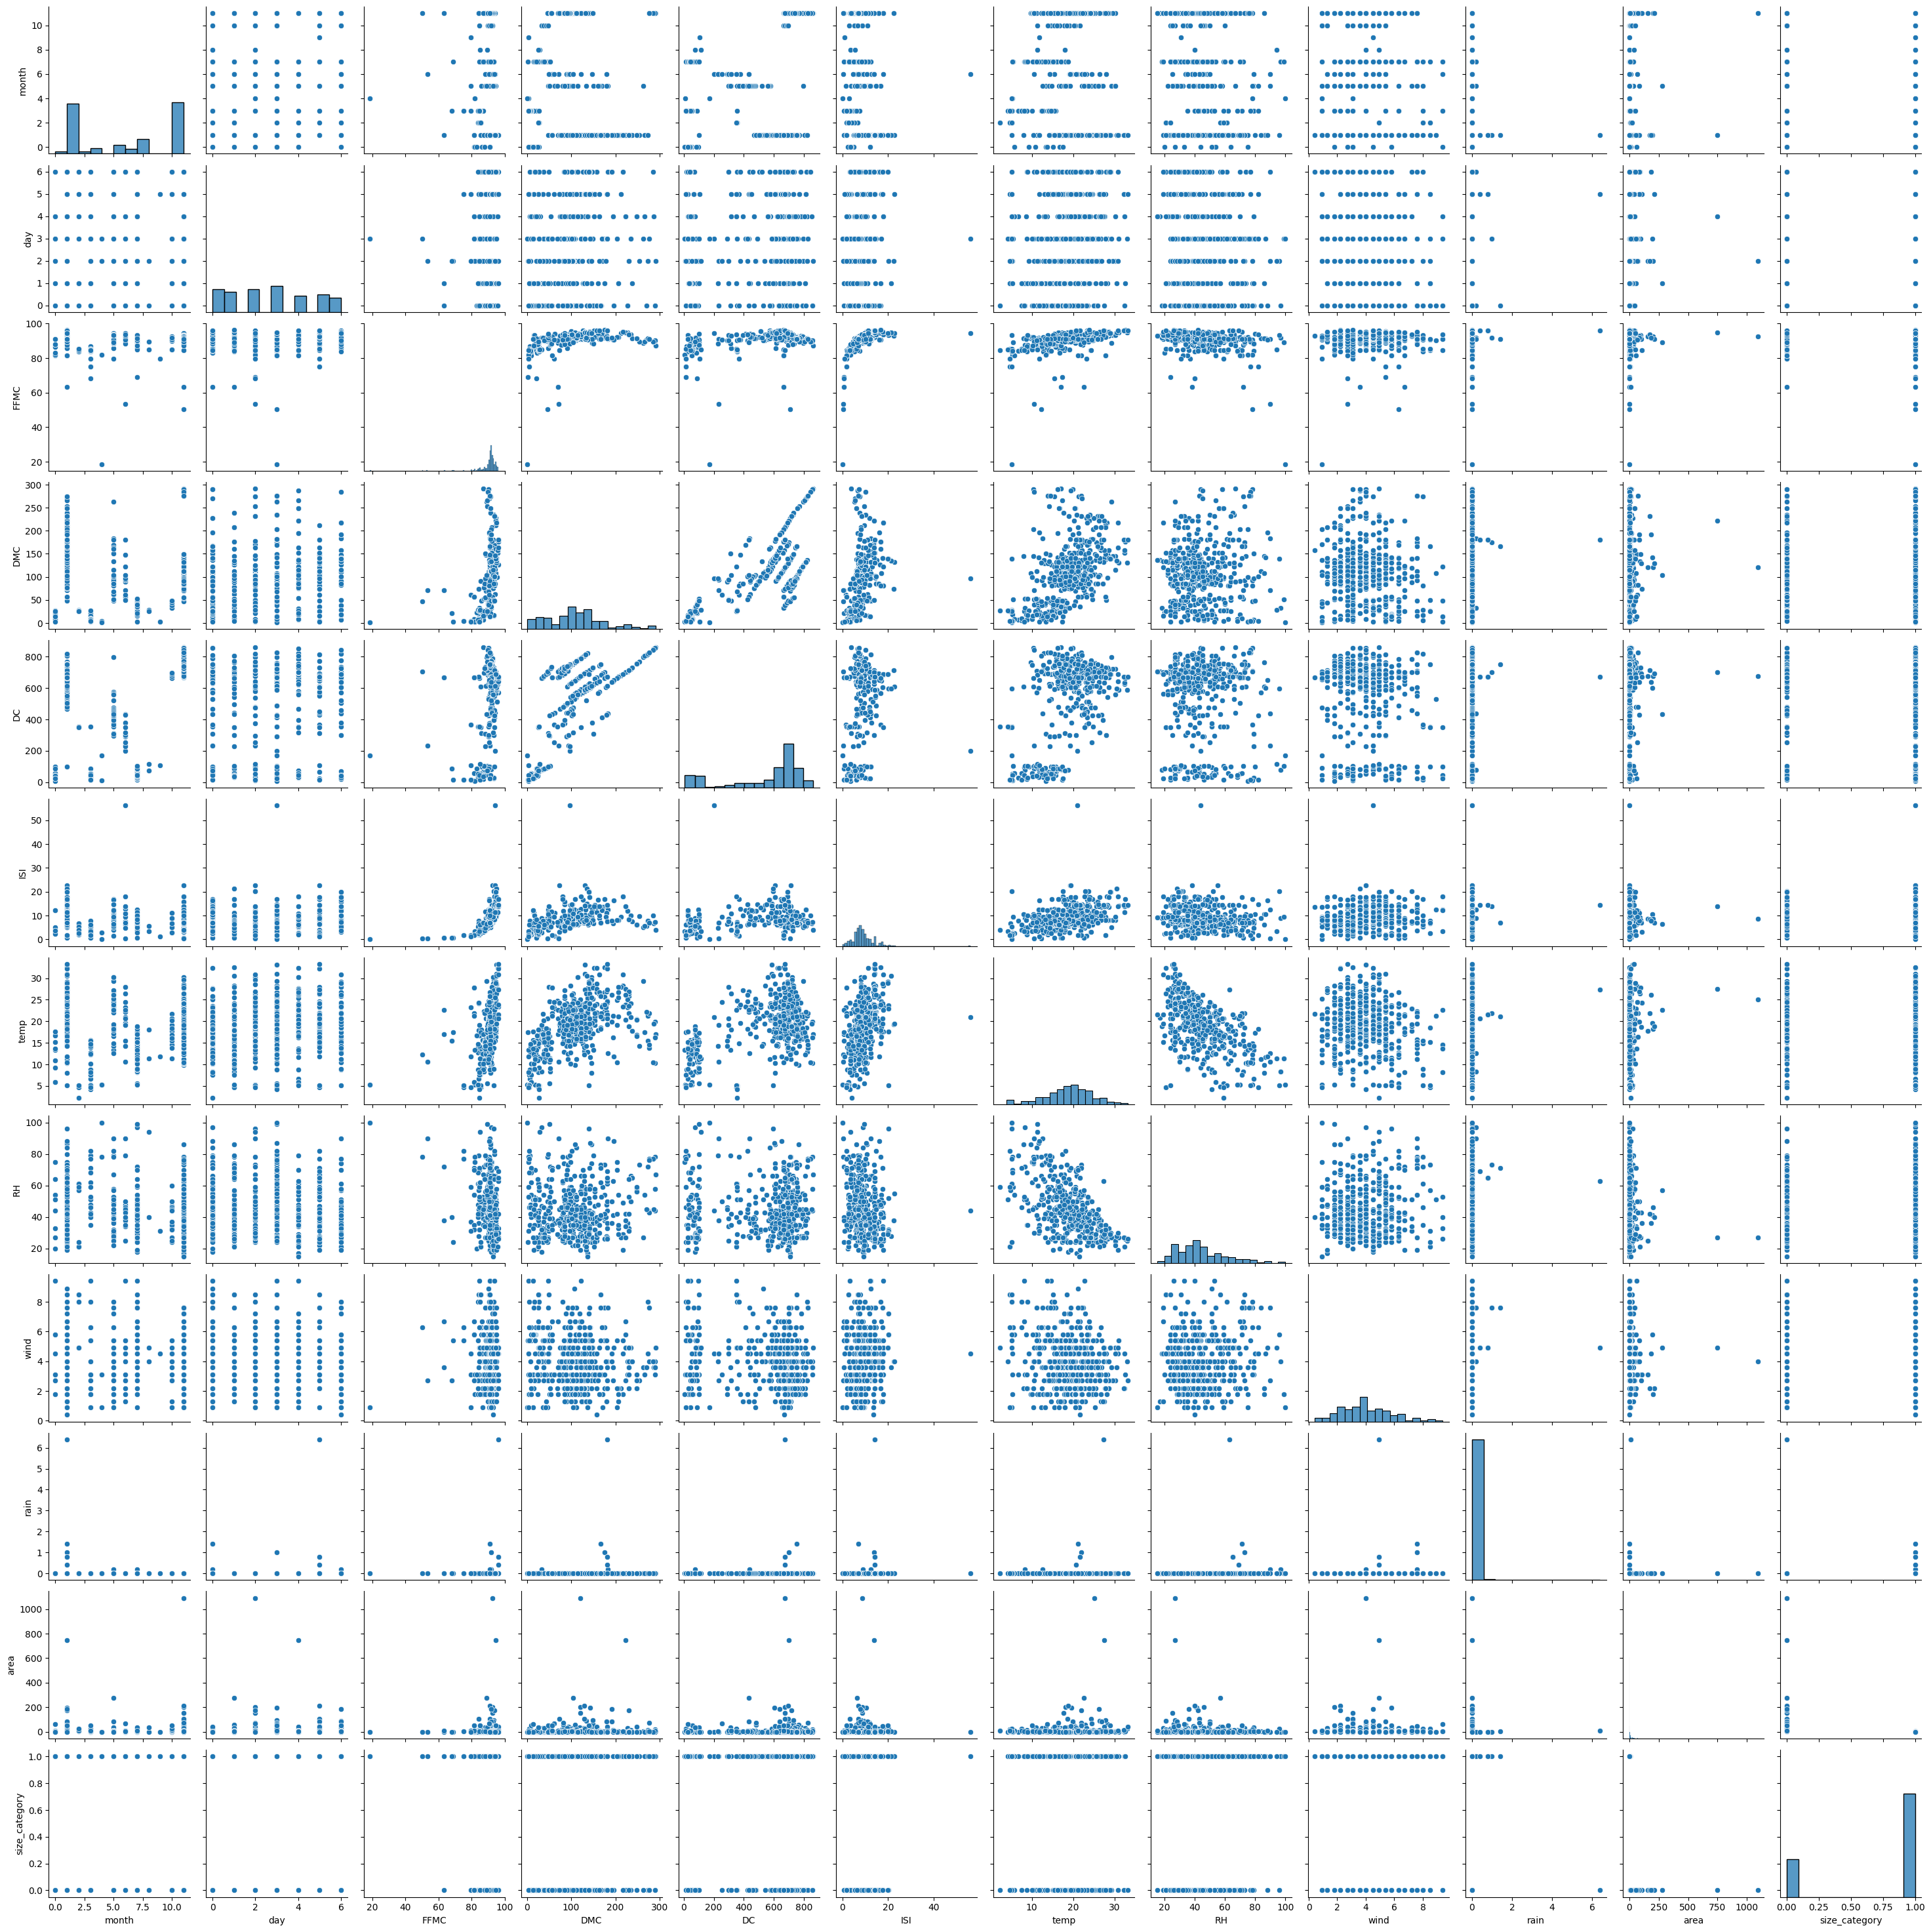

In [53]:
sns.pairplot(forest)

<Axes: >

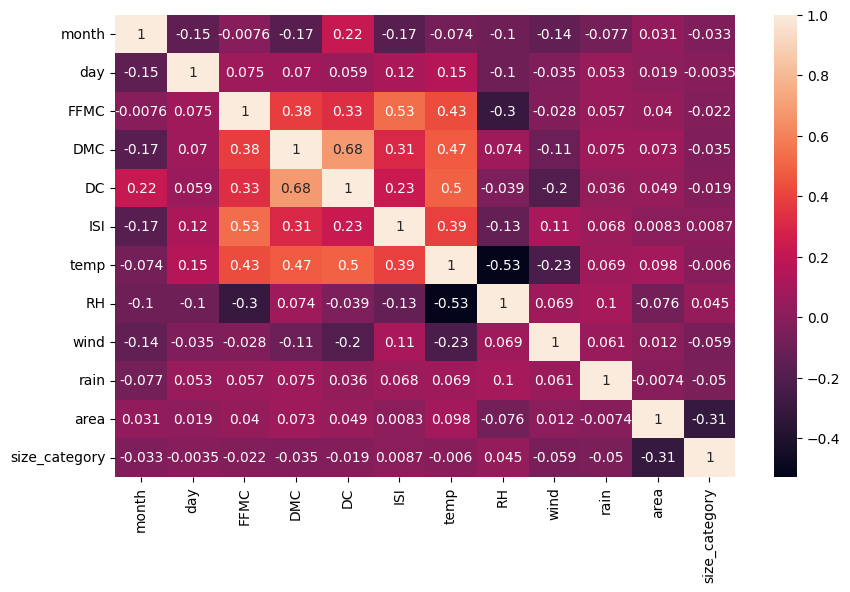

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(forest.corr(),annot=True)

In [55]:
np.random.seed(7)

# split into input (X) and output (Y) variables
X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]

Define the Keras Model

In [56]:
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

Compile the Model

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Fit Keras Model

In [58]:
history = model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=5)

Epoch 1/50
70/70 [==============================] - 1s 5ms/step - loss: 23.6898 - accuracy: 0.7572 - val_loss: 16.8092 - val_accuracy: 0.6784
Epoch 2/50
70/70 [==============================] - 0s 3ms/step - loss: 5.6510 - accuracy: 0.7168 - val_loss: 2.0701 - val_accuracy: 0.6199
Epoch 3/50
70/70 [==============================] - 0s 3ms/step - loss: 1.4730 - accuracy: 0.7514 - val_loss: 1.8615 - val_accuracy: 0.6784
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 1.2911 - accuracy: 0.7399 - val_loss: 1.6612 - val_accuracy: 0.6784
Epoch 5/50
70/70 [==============================] - 0s 4ms/step - loss: 1.1618 - accuracy: 0.7601 - val_loss: 1.3940 - val_accuracy: 0.6959
Epoch 6/50
70/70 [==============================] - 0s 4ms/step - loss: 1.0526 - accuracy: 0.7832 - val_loss: 1.1550 - val_accuracy: 0.7135
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.9551 - accuracy: 0.7746 - val_loss: 1.0030 - val_accuracy: 0.7018
Epoch 8/50
70/70 [

Evaluate the Model

In [59]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9420
accuracy: 94.20%


Here we observe that the above model gives 98.07% accuracy

In [60]:
model.metrics_names,scores

(['loss', 'accuracy'], [0.23192515969276428, 0.9419729113578796])

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the accuracy

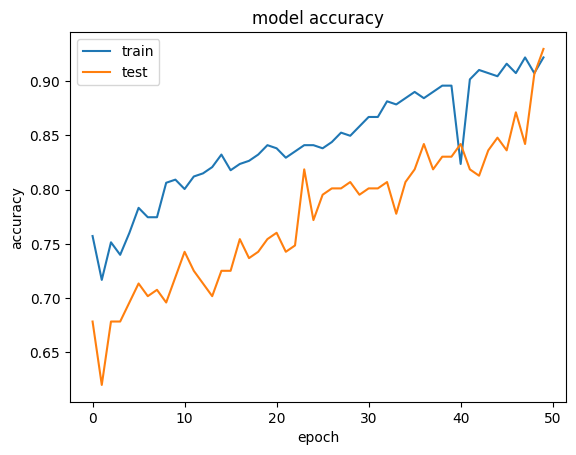

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plotting the loss

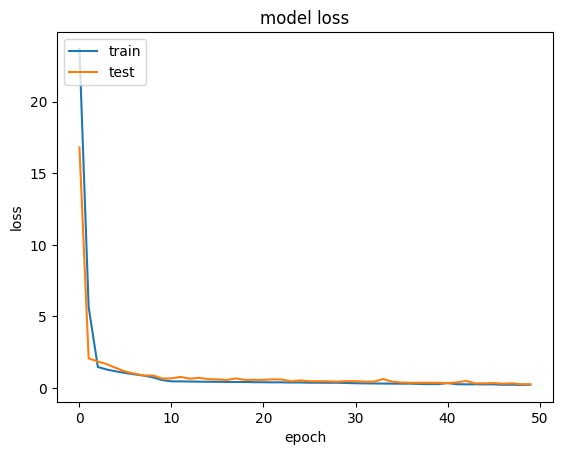

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()